# 06 Classification dengan KNN (K Nearest Neighbours)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

Referensi: [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Sample Dataset

In [48]:
import pandas as pd

sensus = {
    'tinggi': [165, 180, 193, 191, 145, 193, 160, 148, 178],
    'berat': [64, 86, 94, 80, 43, 89, 67, 45, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'pria', 'wanita', 'wanita',
        'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,165,64,pria
1,180,86,pria
2,193,94,pria
3,191,80,pria
4,145,43,wanita
5,193,89,pria
6,160,67,wanita
7,148,45,wanita
8,178,67,wanita


membentuk sebuah dataset yang berisi daftar "berat" dan "tinggi" badan sejumlah partisipan yang sudah diinput beserta jenis kelaminnya, dataset ini akan kita tampung ke dalam format Pandas DataFrame

- import modul pandas (import pandas as pd)
- Penyiapan suatu variable dalam kontes yang di atas disebut sebagai "Sensus" digunakan untuk menampung data dictionary, yang dimana di dalam dictionary ini terdapat 3(tiga) buah keys yaitu: tinggi, berat, dan jk (jenis kelamin)
- dataset ini di tampung ke dalam dataframe "sensus_df"
- pemunculan data set tinggi, berat, dan jk (jenis kelamin) dengan memanggil (sensus_df)

Dataset kali ini terdiri dari 3 buah kolom yaitu 'tinggi', 'berat', dan 'jk'. Pembuatan 3 kolom ini untuk membentuk sebuah model machine learning sederhana yang dapat digunakan untuk memprediksi jenis kelamin seseorang berdasarkan data tinggi dan berat badanya. Dengan kata lain, data tinggi dan berat badan akan berperan sebagai "features", sedangkan jenis kelamin akan berperan sebagai "target".

## Visualisasi Data

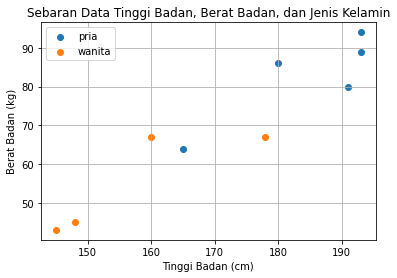

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Pembuatan visualisasi dataset sensus yang telah kita bentuk sebelumnya ke dalam scatter plot, sebuah sumbu x akan berasosisasi dengan tinggi badan, sedangkan sumbu y akan berasosisasi dengan berat badan.

penggunaan dua warna yang berbeda untuk menentukan Pria dan Wanita.


- Import modul matplotlib.
- Membentuk sebuah subplots, dimana akan menangkap objek figure dan axes nya.
- Selanjutnya, kita akan melakukan looping terhadap data sensus df tersebut, dimana sensus df nya kita grouping terlebih dahulu berdasarkan 'jk' atau jenis kelaminnya.
- Pada setiap iterasinya, kita akan menangkap 2 nilai yaitu 'jk' yang merepresentasikan jenis kelamin berdasarkan pengelompokannya, dan yang kedua adalah 'd' yang berisi sekumpulan baris data dari kelompok jenis kelamin tertentu. Karena kita ingin membentuk scatter plot, maka kita panggil 'ax.scatter', dimana sumbu x nya akan diasosiasikan dengan data baris dengan kolom 'tinggi', sedangkan sumbu y akan diasosiasi dengan data baris dengan kolom 'berat', lalu kita sertakan label dimana label tersebut akan disesuaikan dengan kelompok jenis kelaminnya.
- Legend, yang akan berasosiasi dengan 'label=jk'. Maka legendnya hanya akan menampilkan warna biru dan orange tanpa disertai label pria dan wanita. Lalu berikutnya, ketika memanggil 'plt.legend' serta menyertakan parameter 'loc', parameter 'loc' ini digunakan untuk mengatur lokasi atau posisi dari legendnya, yang dalam kasus ini 'loc' nya sebagai upper left, berarti posisinya ada di sudut kiri atas.
- Sebagai data tambahan akan menyertakan judul, label untuk sumbu x dan juga sumbu y 'plt.title', 'plt.xlabel', dan 'plt.ylabel'.
- 'plt.grid' yang diberi nilai true untuk pembuatan data dalam tabel.
- 'plt.show()' Tugasnya untuk memunculkan hasil ploting.

setiap baris ini akan menghasilkan satu data point pada scatter plot nya.

Pada kasus kita kali ini, tujuan utamanya adalah ketika  menemukan suatu data point baru, maka data point tersebut akan coba diprediksi apakah dia masuk kedalam kategori 'pria' atau 'wanita.


## Classification dengan KNN

Melakukan percobaan untuk menerapkan KNN atau (Key Nearest Neighbours) untuk melakukan klasifikasi jenis kelamin berdasarkan data tinggi dan berat badan.

### Preprocessing Dataset

In [50]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[165  64]
 [180  86]
 [193  94]
 [191  80]
 [145  43]
 [193  89]
 [160  67]
 [148  45]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'pria' 'wanita' 'wanita' 'wanita']


Sebelum melangkah ke proses training model, author perlu melakukan beberapa penyesuaian pada dataset sensus tersebut, dimana pengkonversikan data tinggi badan dan berat badan ke dalam numpy array. Selanjutnya ditampung ke dalam variabel 'X_train' sebagai kumpulan features untuk training set. Lalu untuk kolom 'jenis kelamin' juga kita akan konversikan menjadi numpy array untuk selanjutnya kita tampung ke dalam variabel 'y_train' sebagai sekumpulan nilai target untuk training set.

- import numpy as np untuk pembuatan list array.
- Bentuk 2 buah numpy array. Untuk numpy array yang pertama akan dibentuk berdasarkan kolom tinggi dan berat dari 'sensus_df' yang ditampung ke dalam variabel 'X_train', sedangkan numpy array kedua akan dibentuk berdasarkan kolom 'jk' dari 'sensus_df' yang kita tampung ke dalam variabel 'y_train'.
- Lalu ditampilkan dengan cara di print kedua variabel tersebut.

X_train berisi sekumpulan nilai features, sedangkan y_train akan berisi sekumpulan nilai target. Jika diperhatikan pada sekumpulan nilai features untuk training set yang kita miliki sudah dalam format array dua dimensi dan tipe datanya pun sudah berupa data numerik, artinya sekumpulan nilai features ini sudah siap digunakan untuk proses training. Tetapi jika diperhatikan nilai targetnya, tipe datanya berupa string.

Karena jenis kelamin ini hanya terdiri dari 2 nilai, dalam kasus ini adalah 'pria' dan 'wanita', maka kita bisa memanfaatkan label binarizer untuk melakukan konversi nilai string tersebut menjadi nilai numerik biner.

In [51]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]]



- Lakukan import modul ('from sklearn.preprocessing import LabelBinarizer').
- Mencoba membentuk objek dari class label binarizer ini, dengan cara memanggil ('lb = LabelBinarizer()') yang akan ditampung ke dalam variabel 'lb'.
- Selanjutnya, objek label binarizer tersebut akan dimanfaatkan untuk melakukan transformasi data yang terdapat dalam variabel 'y_train'. panggil ('lb.fit_transform(y_train)') yang nilainya ditampung kembali ke dalam variabel 'y_train'.
- Lakukan print out terhadap variabel 'y_train'.

Output tersebut hanya terdapat 2 nilai yaitu 0 dan 1. Dalam hal ini nilai 0(nol) akan merepresentasikan data 'pria', sedangkan nilai 1(satu) akan merepresentasikan data wanita.

Setelah melalui proses transformasi data dengan label binarizer, sekumpulan nilai target yang kita miliki ini, sekarang tersimpan dalam format array 2 dimensi. Oleh karena itu, kita perlu kembalikan menjadi array satu dimensi dengan method flatten.

In [52]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 0 1 1 1]


Memanggil fungsi 'y_train.flatten()' yang akan ditampung ke dalam variabel y_train.
Lakukan pemanggilan dengan print untuk melihat hasilnya.


### Training KNN Classification Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)


- import terlebih dahulu estimater class 'from sklearn.neighbors import KNeighborsClassifier'. Disini memilih KNeighbors Classifier karena akan menggunakan KNN ini untuk clasification task.
- Disini terdapat satu parameter yang harus dispesifikasikan nilainya yaitu paremeter 'K'. Untuk kasus kali ini nilai 'K' kita akan set sebagai 3. Nilai parameter 'K' ini digunakan untuk menentukan jumlah tetangga terdekat yang akan dilibatkan untuk proses prediksi, dan untuk kasus kali ini adalah 3 tetangga terdekat.
- Setelah nilai 'K' ditentukan, selanjutnya bentuk objek dari class KNeighbors Classifier. KNeighbors Classifier ini akan membutuhkan satu parameter yaitu n_neighbors yang diberi nilai 'K' lalu kita tampung kedalam variabel 'model'.
- Untuk selanjutnya, akan melakukan training dengan memanfaatkan X_train dan y_train yang sudah dipersiapkan sebelumnya.
- Pada kali ini, proses trainingnya akan dilakukan dengan cara memanggil 'model.fit(X_train, y_train)'

### Prediksi Jenis Kelamin

In [54]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

array([[155,  70]])


- Tinggi badan sebesar 155 dan berat badan sebesar 70 yang akan kita prediksi jenis kelaminnya apakah pria atau wanita.
- Nilai featuresnya harus  dibentuk dulu menjadi suatu numpy array. 'np.array' lalu tinggi badan dan berat badannya '([tinggi_badan, berat_badan])'. Karena disini hanya terdapat satu dataset atau instance saja, maka perlu kita melakukan reshape menjadi array 2 dimensi 'reshape(1, -1)'. Lalu array ini akan ditampung ke dalam variabel 'X_new'.
- Tampilkan dengan memanggil X_new


In [55]:
y_new = model.predict(X_new)
y_new

array([1])

- Memanggil fungsi 'model.predict' lalu sertakan '(X_new)'  dimana hasil prediksinya akan ditampung kedalam variabel 'y_new'.
- Lalu kita tampilkan pada layar.

Hasil prediksi yang keluar di atas menunjukan bahwa hasilnya 1 yaitU perempuan

In [56]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

hasil konveri baliknya, disini bisa mengetahui bahwa nilai 1 untuk target itu berkolerasi dengan jenis kelamin wanita atau dengan kata lain, tinggi badan 155 dengan berat badan 70 tersebut diprediksi sebagai data 'wanita' oleh model yang sudah kita training sebelumnya.

### Visualisasi Nearest Neighbours

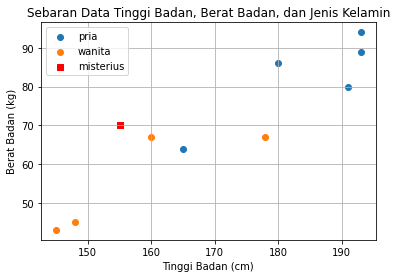

In [57]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

- Memanggil 'plt.subplots()' untuk mendapatkan objek figure dan axes nya.
- Lalu berikutnya, akan mencoba tampilkan kembali data points dari dataset yang kita miliki. Caranya kurang lebih sama dengan cara sebelumnya, hanya saja disini kita akan menyertakan marker baru pada scatter plot kita. Marker baru ini dihasilkan dengan memanggil 'plt.scatter' dimana nilai x nya itu berasal dari variabel tinggi_badan daan nilai y nya berasal dari berat_badan, sedangkan untuk markernya kita beri nilai 's' karena kita bentuk markernya sebagai square atau kotak. Lalu color kita berikan warna merah 'red', dan labelnya kita beri label 'misterius'.


### Kalkulasi Distance (Euclidean Distance)


$distance = \sqrt{ (t_1 - t_2)^2 + (b_1 - b_2)^2 }$

Referensi: [https://en.wikipedia.org/wiki/Euclidean_distance](https://en.wikipedia.org/wiki/Euclidean_distance)


Setelah kita mempelajari cara kerja KNN secara umum atau secara general, berikutnya akan dipelajari bagimana KNN mengukur jarak atau kedekatan antara data baru yang diprediksi dengan sekumpulan data lain pada dataset training. Pada kali ini, kita akan mengenal euclidean distance untuk mengukur jarak antara satu data ponit dengan data point lainnya.

Rumus Euclidean Distance :

- t  : merepresentasikan tinggi badan.
- b  : merepresentasikan berat badan.
- t1 : merepresentasikan data tinggi badan dari data point yang pertama.
- t2 : merepresentasikan data tinggi badan dari data point yang kedua.
- b1 : merepresentasikan data berat badan dari data point yang pertama.
- b2 : merepresentasikan data berat badan dari data point yang kedua.

Formula atau rumus tersebut dapat kita gunakan untuk mengukur jarak atau distance atau kedekatan antara data point pertama dengan data point kedua. proses kalkulasi yang diterapkan oleh KNN dalam menentukan tetangga terdekat untuk suatu data point yang akan diprediksi.


In [58]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

 data point misterius tersebut akan dibentuk terlebih dahulu ke dalam format numpy array 'np.array([tinggi_badan, berat_badan])'

In [59]:
X_train

array([[165,  64],
       [180,  86],
       [193,  94],
       [191,  80],
       [145,  43],
       [193,  89],
       [160,  67],
       [148,  45],
       [178,  67]], dtype=int64)

tampilkan sekumpulan nilai features dari training set. Mencoba hitung jarak berdasarkan euclidean distance antara data point misterius dengan setiap data point lain pada dataset 'X_train'.

X_train merupakan list.

In [60]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[11.661903789690601,
 29.68164415931166,
 44.94441010848846,
 37.36308338453881,
 28.792360097775937,
 42.485291572496,
 5.830951894845301,
 25.96150997149434,
 23.194827009486403]

- Untuk menghitung jarak antara keduanya, digunakan function euclidean yang sudah disertakan pada scipy cara memanggil  'from scipy.spatial.distance import euclidean'.
- Lalu berikutnya kita tinggal pakai saja euclidean distancenya. funtion euclidean system tersebut digunakan untuk mengukur jarak atau kedekatan atau distancenya antara data point misterius dengan suatu data point lain (dalam kasus ini adalah 'd') di dalam variabel 'X_train' yang ditampung ke dalam variabel 'data_jarak'.
- jarak antara data point misterius dengan data point pertama pada 'X_train' (158) adalah (6.708203932499369) dan seterusnya.

In [61]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
6,160,67,wanita,5.830952
0,165,64,pria,11.661904
8,178,67,wanita,23.194827
7,148,45,wanita,25.961510
4,145,43,wanita,28.792360
1,180,86,pria,29.681644
3,191,80,pria,37.363083
5,193,89,pria,42.485292
2,193,94,pria,44.944410


- Membentuk kolom baru pada 'sensus_df' dengan memanfaatkan data jarak 'sensus_df['jarak'] = data_jarak' artinya author membentuk kolom baru pada sensus df dengan nama jarak, lalu datanya kita ambil dari variabel 'data_jarak' 
- Melihat bahwa datanya sudah terurut berdasarkan kolom jarak. Kali ini nilai 'k' nya adalah 3, maka kita akan hanya memperhatikan 3 data point dengan jarak terdekat atau jarak terkecil dengan data point misterius yang kita miliki. bisa kita lihat bahwa 3 baris pertama merupakan 3 neighbor terdekat yang akan diperhatikan untuk melakukan proses prediksi.

### Evaluasi KNN Classification Model

#### Testing Set

In [62]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


- testing set tersebut terdiri dari 4 data point. numpy array yang terdiri dari 4 baris dan 2 kolom sebagai 'X_test'.
- Menyiapkan target yang terdiri dari 4 data yaitu 'pria', 'pria', 'wanita', 'wanita' yang harus ditransformasikan menjadi nilai numerik biner dengan memanfaatkan label binarizer dengan memanggil 'lb.transform' yang akan menghasilkan array 2 dimensi, padahal yang kita harapkan untuk 'y_test'adalah array 1 dimensi. memanggil method flatten.
- Jika kita lihat pada hasil outputnya sudah sesuai dengan harapan kita yang dimana X_test nya terdiri dari sekumpulan nilai numerik yang di bundle atau dikemas sebagai array 2 dimensi. Demikian juga nilai y_test nya yang terdiri dari sekumpulan nilai numerik biner untuk kasus kita kali ini yang di bundle dalam suatu numpy array satu dimensi.

#### Prediksi terhadap testing set

In [63]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

#### Accuracy

Accuracy is the proportion of test instances that were classified correctly.

$accuracy = \frac{tp\ +\ tn}{tp\ +\ tn\ +\ fp\ +\ fn}$



rumus accuracy :

- tp = true positive
- tn = true negative
- fp = false postive
- fn = false negative

True postif dan true negatif merepresentasikan hasil prediksi atau klasifikasi yang benar. True postive berarti sesuatu yang bernilai positif telah dengan tepat diprediksi sebagai positif oleh model, sedangkan true negative berarti sesuatu yang bernilai negatif telah dengan tepat diprediksi sebagai sesuatu yang negatif oleh model atau dengan kata lain.

Jika mengacu pada kasus tersebut, true positif berarti model sudah dengan tepat memprediksi data pria sebagai pria dan data wanita sebagai wanita, sedangkan true negatif berarti model sudah dengan tepat memprediksi sebagai data wanita sebagai bukan pria dan data pria sebagai bukan wanita.

Dua istilah berikutnya adalah false positive dan false negative, keduanya merepresentasikan hasil prediksi atau klasifikasi yang salah. False positive berarti sesuatu yang bernilai negatif telah keliru diprediksi sebagai positif oleh model. Sedangkan false negative, berarti sesuatu yang bernilai postif telah keliru diprediksi sebagai negatif oleh model atau jika kita kita mengacu pada kasus tersebut, false positif berarti model sudah dengan keliru memprediksi data wanita sebagai pria dan data pria sebagai wanita, sedangkan false negative berarti model sudah dengan keliru memprediksi data pria sebagai bukan pria dan data wanita sebagai bukan wanita.


Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [64]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


- Cara pemanfaatannya cukup sederhana, kita tinggal memanggil saja 'accuracy_score' dengan menyertakan 2 buah parameter. Parameter pertama adalah 'y_test' dan parameter kedua adalah 'y_pred'. 'y_test' merupakan target dari testing set, sedangkan 'y_pred' merupakan hasil prediksi untuk target dari testing setnya, lalu nilai akurasi ini kita tampung ke dalam variabel acc. 
- Print(f'Accuracy:{acc}').


#### Precission 

Precision is the proportion of test instances that were predicted to be positive that are truly positive. 

$precission = \frac{tp}{tp\ +\ fp}$

 rumus atau formula precission :

- tp : merepresentasikan nilai true positive.
- fp : merepresentasikan nilai false positive.


Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [65]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


- Import precision score dengan cara 'from sklearn.metrics import precision_score'.
- Menggunakan evaluation matrix yang lainnya, cara memanggil 'precision_score(y_test, y_pred)', Serta nilai 'y_test' dan juga 'y_pred' sebagai parameternya.
- hasil ditampung ke dalam variabel 'prec'.
- Tampilkan print(f'Precission: {prec}').


#### Recall 

Recall is the proportion of truly positive test instances that were predicted to be positive.

$recall = \frac{tp}{tp\ + \ fn}$

formula atau rumus recall :

- tp : merepresentasikan nilai true positive.
- fn : merepresentasikan nilai false negativ.

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [66]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 1.0


- 'rec = recall_score(y_test, y_pred)'. Seperti biasa nilai 'y_test' dan 'y_pred' merupakan parameternya, yang ditampung ke dalam variabel 'rec'.
- Tampilkan print(f'Recall: {rec}').


#### F1 Score 

The F1 score is the harmonic mean of precision and recall.

$F1 = 2 \times \frac{precission\ \times \ recall}{precission\ + \ recall}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [67]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


- Import terlebih dahulu 'from sklearn.metrics import f1_score'.
- 'f1 = f1_score(y_test, y_pred)' dimana 'y_test' dan 'y_pred' sebagai parameternya yang akan ditampung ke dalam variabel 'f1'.
- print.

Berdasarkan output hasil f1-score nya adalah 0.8.

#### Classification Report

In [68]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Bisa dilihat nilai precision, recall, dan f1-score dan juga bisa dilihat pengklasifikasiannya. Keempat matriks evaluasi yang dipelajari ini ditunjukan untuk binary classifier, dimana berapa pun banyaknya jumlah class atau kelompok nilai yang terdapat pada targets tetap akan diasumsikan sebagai dua kelompok nilai saja yaitu positif atau negatif.

Disini nilai biner satu akan dipandang sebagai nilai positif secara deafult, sedangkan nilai biner 0 akan dipandang sebagai nilai negatif.

Classification report yang ditampilkan mencangkup nilai presicion recall dan f1-score untuk keseluruhan kelas baik yang bernilai 0 maupun 1. Oleh karena itu, sebaiknya untuk menggunakan classification report daripada melakukan pengukuran precision, recall, serta f1-score secara terpisah. Selain itu, classification report juga menampilkan nilai rata-rata untuk precision, recall, dan f1-score.

#### Matthews Correlation Coefficient (MCC)

- MCC merupakan alternatif untuk f1-score yang digunakan untuk keperluan pengukuran performa dari binary classifier. 
- Nilai tertingginya adalah satu. 
- Prediksinya dilakukan secara random atau acak dan asal maka nilai scorenya adalah 0, atau jika model classifier nya benar-benar kacau maka akan menghasilkan nilai -1. Oleh karena itu, nilai rentan MCC ini dimulai dari -1 untuk kondisi terburuk sampai dengan 1 untuk kondisi terbaiknya.

$MCC = \frac{tp \ \times \ tn + fp \ \times \ fn}{\sqrt{(tp + fp) \ \times \ (tp + fn) \ \times \ (tn + fp) \ \times \ (tn + fn)}}$


$MCC = \frac{tp\ \times\ tn\ + fp\ \times\ fn}{ \sqrt{ (tp\ +\ fp)\ \times\ (tp\ +\ fn)\ \times\ (tn\ +\ fp)\ \times\ (tn\ +\ fn)  }  }$

Referensi: [https://en.wikipedia.org/wiki/Matthews_correlation_coefficient](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)

In [69]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258


Tahapan menggunakan MCC untuk melakukan evaluasi model machine learning pada SkLearn.

- Pertama, kita memanggil'from sklearn.metrics import matthews_corrcoef'.
- Lalu untuk menggunakan matthews correlation coefficient ini kita tinggal panggil saja 'matthews_corrcoef' lalu sertakan parameternya yang dalam hal ini, parameter pertama adalah'y_test' dan parameter kedua adalah 'y_pred' yang kemudian kita tampung ke dalam variabel mcc.
- Kemudian tampilkan ke layar print(f'MCC: {mcc}').

Berdasarkan output nilai MCC nya adalah 0.5773502691896258.
